### Machine Learning Model - Logistic Regression

In [13]:
#Prepare the data
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

#Retrieve the data from CSV files and populate it in a data frame.
dictionary = pd.read_excel('Data/neis-data-dictionary_terms.xlsx')
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(main_df.describe())

        business_id   anzsic_code         metro      sv_month       sv_year  \
count  53646.000000  53596.000000  53646.000000  11147.000000  11147.000000   
mean   26827.169258   7423.195780      0.058308      6.606262   2012.755898   
std    15488.324811   2428.965571      0.234327      3.435323      1.818195   
min        1.000000    100.000000      0.000000      1.000000   2009.000000   
25%    13414.250000   5259.000000      0.000000      4.000000   2011.000000   
50%    26827.500000   7869.000000      0.000000      6.000000   2012.000000   
75%    40239.750000   9525.000000      0.000000     10.000000   2014.000000   
max    53654.000000   9901.000000      1.000000     12.000000   2017.000000   

       sv_hours_work  sv_staff_lt35h  sv_staff_gt35h  sv_end_train  \
count    8102.000000     5803.000000     5296.000000   3049.000000   
mean       35.280449        0.558849        0.405778      1.296491   
std        21.909007        2.007426        2.342488      0.598547   
min     

In [14]:
#Data Cleaning - This step is already performed as part of Data wrangling. Features are identified.
# Replace Nan/ missing values in the feature 'SV_HOURS_WORK' with the mean value of the non-NAN values.
main_df.sv_hours_work = main_df.sv_hours_work.fillna(main_df.sv_hours_work.mean())
main_df.describe()

,business_id,anzsic_code,metro,sv_month,sv_year,sv_hours_work,sv_staff_lt35h,sv_staff_gt35h,sv_end_train,sv_end_mentor,sv_end_profit,sv_end_dem,sv_end_loc,sv_end_health,sv_end_oth,sv_sat_bus_train,sv_sat_mentor,sv_tailor_sup,sv_sat_overall
count,53646.000000,53596.000000,53646.000000,11147.000000,11147.000000,53646.000000,5803.000000,5296.000000,3049.000000,3075.000000,3227.000000,3144.000000,2969.000000,3044.000000,2699.000000,10700.000000,10593.000000,10582.000000,10408.000000
mean,26827.169258,7423.195780,0.058308,6.606262,2012.755898,35.280449,0.558849,0.405778,1.296491,1.386992,2.335606,1.986323,1.458404,1.499671,2.086328,4.081682,3.864628,3.716689,3.877786
std,15488.324811,2428.965571,0.234327,3.435323,1.818195,8.513877,2.007426,2.342488,0.598547,0.684782,0.821582,0.823689,0.712119,0.781607,0.923077,1.177991,1.325153,1.404108,1.305337
min,1.000000,100.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13414.250000,5259.000000,0.000000,4.000000,2011.000000,35.280449,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000
50%,26827.500000,7869.000000,0.000000,6.000000,2012.000000,35.280449,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000
75%,40239.750000,9525.000000,0.000000,10.000000,2014.000000,35.280449,1.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,53654.000000,9901.000000,1.000000,12.000000,2017.000000,120.000000,99.000000,55.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
# Representing the gender as NUMBERS i.e. Male: 1 and Female: 0
def convert_gender(x):
    if "M" in x:
        return 1
    elif "F" in x:
        return 0
    else: return 0
    
# Representing the Success_indicators as NUMBERS i.e. SUCCESS - Y: 1 and SUCCESS - N (Failure): 0    
def convert_successful(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 0
    else: return 0   
# Bring all the personality types as a single column in the Data frame.
def identify_personality(x):
    if x['indigenous_ind'] == 'Y':
        #return "indigenous_ind"
        return 1        
    elif x['ex_offender_ind'] == 'Y':
        #return "ex_offender_ind"
        return 1        
    elif x['nesb_ind'] == 'Y':
        #return "nesb_ind"
        return 1        
    elif x['refugee_ind'] == 'Y':
        #return "refugee_ind"
        return 1        
    elif x['disability_ind'] == 'Y':
        #return "disability_ind"
        return 1        
    elif x['homeless_ind'] == 'Y':
        #return "homeless_ind"
        return 1        
    elif x['sole_parent_ind'] == 'Y':
        #return "sole_parent_ind"
        return 1
    else:
        #return "NO_PERSONALITY"    
        return 0

# Some of the columns store text/ Business IDs and they dont make much sense. Therefore, consider numerical columns.
main_model = main_df[['business_id','exit_reason','state','metro','age_group','gender_cd','industry_type',
                      'sv_hours_work','indigenous_ind','ex_offender_ind','nesb_ind','refugee_ind','disability_ind','homeless_ind',
                      'sole_parent_ind','successful']].copy()
#we need to find the "Success percentage per community/personality type" and check whether this correlates
# with our target.
#main_model['personality_type'] = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model['indigenous_ind'] = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.ex_offender_ind   = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.nesb_ind          = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.refugee_ind       = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.disability_ind    = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.homeless_ind      = main_model.apply(lambda row: identify_personality(row),axis=1)
main_model.sole_parent_ind   = main_model.apply(lambda row: identify_personality(row),axis=1)

# Some of the features in the above dataframe above text/ descriptions and these can be converted to numerical equivalents.
# for Instance, in "gender_cd", male can be represented as 1 and female can be represented as 0   
main_model["success_indicator"] = main_model["successful"].apply(convert_successful)
#main_model["neis_allowance_ind"] = main_model["neis_allowance_ind"].apply(convert_gender) # function for "gender" can be applied here
main_model["gender_cd"] = main_model["gender_cd"].apply(convert_gender)

main_model.describe()

,business_id,metro,gender_cd,sv_hours_work,indigenous_ind,ex_offender_ind,nesb_ind,refugee_ind,disability_ind,homeless_ind,sole_parent_ind,success_indicator
count,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000,53646.000000
mean,26827.169258,0.058308,0.516143,35.280449,0.475171,0.464415,0.449185,0.347854,0.339653,0.138184,0.100380,0.685046
std,15488.324811,0.234327,0.499744,8.513877,0.499388,0.498737,0.497416,0.476294,0.473596,0.345096,0.300509,0.464502
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13414.250000,0.000000,0.000000,35.280449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26827.500000,0.000000,1.000000,35.280449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,40239.750000,0.000000,1.000000,35.280449,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,53654.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Segregating the Features and the TARGET

In [16]:
# Before building the features, create dummy variables for the categorical variables.
X = main_model[['industry_type','state','gender_cd','sv_hours_work','metro','age_group','indigenous_ind','ex_offender_ind','nesb_ind','refugee_ind','disability_ind','homeless_ind',
                      'sole_parent_ind']]
y = (main_model.success_indicator == 1).values # main_model['success_indicator']

n_industry = pd.get_dummies(main_model.industry_type)
X = pd.concat([X, n_industry], axis=1)

n_state = pd.get_dummies(main_model.state)
X = pd.concat([X, n_state], axis=1)

#n_metro = pd.get_dummies(main_model.metro)
#X = pd.concat([X, n_metro], axis=1)

n_age = pd.get_dummies(main_model.age_group)
X = pd.concat([X, n_age], axis=1)


drop_col = ['industry_type', 'state','age_group']
X.drop(drop_col, inplace=True, axis=1)
X = X.values
print(y.shape)
print(X.shape)

print(y)


(53646,)
(53646, 45)
[ True  True False ...  True  True  True]


In [17]:
# Now the data is ready. Build a logistic regression model and apply the training data to it.
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(X.shape,y.shape)
# infinite values and NAN are causing issues while attempting to fit the data. 

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=5)

# Create the classifier: logreg
logreg = LogisticRegression() # penalty='l1'

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred_test = logreg.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_pred_test, y_test):",accuracy_score(y_pred_test, y_test))

y_pred_train = logreg.predict(X_train)
print("\n")
print("[Train] Accuracy score (y_pred_train, y_train):",accuracy_score(y_pred_train, y_train))


print("Classification Report for Training data: ")
print(classification_report(y_train, y_pred_train))

# Compute and print the classification report
print("\n")
print('Classification Report for Test data: ')
print(classification_report(y_test, y_pred_test))


(53646, 45) (53646,)


/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




[Test] Accuracy score (y_pred_test, y_test): 0.6927378467044438


[Train] Accuracy score (y_pred_train, y_train): 0.6957051250186409
Classification Report for Training data: 
              precision    recall  f1-score   support

       False       0.59      0.10      0.17     12632
        True       0.70      0.97      0.81     27602

   micro avg       0.70      0.70      0.70     40234
   macro avg       0.65      0.53      0.49     40234
weighted avg       0.67      0.70      0.61     40234



Classification Report for Test data: 
              precision    recall  f1-score   support

       False       0.60      0.10      0.18      4264
        True       0.70      0.97      0.81      9148

   micro avg       0.69      0.69      0.69     13412
   macro avg       0.65      0.54      0.49     13412
weighted avg       0.67      0.69      0.61     13412



Based on the above results:

    1) Both training and test accuracy scores are almost the same and so there is no OVERFITTING
    
    2) There is no large gap between any of the observed metrics - PRECISION, RECALL & F1-SCORE.
    
    3) We find that there are more successfull businesses than failures (False/True)

#### HyperParameter Tuning - Determine Reg.parameter 'C' using Grid search with Cross-Validation

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data         

    #y_pred_train = clf.predict(x)
    #classification = classification_report(y, y_pred_train)
    return result / nfold #,classification # average

#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

print('Find the Score and Classification for Training data:')
print('\n')
#from sklearn.linear_model import LogisticRegressionCV
for i in Cs: 
    clf_1 = LogisticRegression(C=i)
    score_train = cv_score(clf_1, X_train, y_train)    # classification_train
    print(score_train)
    print('\n')

Find the Score and Classification for Training data:




/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-pa

0.6856390808153231




/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.695506352947994




/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-pa

0.6954069308386186




/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-pa

0.6953820706777956




/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-pa

0.695431778643497




Regularization parameter C = 0.1 appears to have yielded the highest value.

#### Performing Grid Search based on CV = 0.1

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
param_grid = {'C': [0.1]}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression() ## Not introducing penalty L1/ L2 as there is no overfitting

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

result = accuracy_score(logreg_cv.predict(X_test), y_test)
print('Accuracy score for Grid search:',result)

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-pa

Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.6955062882139484
Accuracy score for Grid search: 0.6930360870861915


#### Classification reports based on GridSearchCV

In [20]:
y_predcv_train = logreg_cv.predict(X_train)
print("\n")
print("[Train] Accuracy score (y_pred_train, y_train):",accuracy_score(y_predcv_train, y_train))

print("Classification Report for Training data: ")
print(classification_report(y_train, y_predcv_train))


# Predict the labels of the test set: y_pred
y_predcv_test = logreg_cv.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_pred_test, y_test):",accuracy_score(y_predcv_test, y_test))


# Compute and print the classification report
print('Classification Report for Test data: ')
print(classification_report(y_test, y_predcv_test))



[Train] Accuracy score (y_pred_train, y_train): 0.6960282348262663
Classification Report for Training data: 
              precision    recall  f1-score   support

       False       0.60      0.10      0.17     12632
        True       0.70      0.97      0.81     27602

   micro avg       0.70      0.70      0.70     40234
   macro avg       0.65      0.53      0.49     40234
weighted avg       0.67      0.70      0.61     40234



[Test] Accuracy score (y_pred_test, y_test): 0.6930360870861915
Classification Report for Test data: 
              precision    recall  f1-score   support

       False       0.60      0.10      0.17      4264
        True       0.70      0.97      0.81      9148

   micro avg       0.69      0.69      0.69     13412
   macro avg       0.65      0.54      0.49     13412
weighted avg       0.67      0.69      0.61     13412



#### Classification Results:

Based on the above results, nearly 70% of the data belongs to 'TRUE' and only 30% contains the FALSE datasets.
Therefore, we may have to perform Oversampling / undersampling techniques to check the classification results when
there is equal occurrence of TRUE/ FALSE datasets.

In [21]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
#print(ax1)
#X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)
clf_svc = LinearSVC().fit(X_train, y_train)
#plot_decision_function(X_train, y_train, clf, ax1)
#ax1.set_title('Linear SVC with y={}'.format(Counter(y_train)))
sampler = RandomUnderSampler(random_state=0)
clf_svc = make_pipeline(sampler, LinearSVC())
clf_svc.fit(X_train, y_train)
y_predict_train = clf_svc.predict(X_train)
print("\n")
print("[Train] Accuracy score (y_pred_train, y_train):",accuracy_score(y_pred_train, y_train))


print("Classification Report for Training data: ")
print(classification_report(y_train, y_predict_train))
#plot_decision_function(X_train, y_train, clf, ax2)
#ax2.set_title('Decision function for {}'.format(sampler.__class__.__name__))
#plot_resampling(X_train, y_train, sampler, ax3)
#ax3.set_title('Resampling using {}'.format(sampler.__class__.__name__))
#fig.tight_layout()

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)




[Train] Accuracy score (y_pred_train, y_train): 0.6957051250186409
Classification Report for Training data: 
              precision    recall  f1-score   support

       False       0.32      0.99      0.48     12632
        True       0.78      0.02      0.03     27602

   micro avg       0.32      0.32      0.32     40234
   macro avg       0.55      0.50      0.25     40234
weighted avg       0.63      0.32      0.17     40234



/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


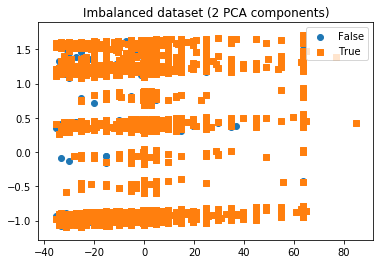

In [37]:
from imblearn.datasets import make_imbalance
from sklearn.decomposition import PCA

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)

plot_2d_space(X_train, y_train, 'Imbalanced dataset (2 PCA components)')

#X_rs, y_rs = make_imbalance(X_train, y_train, ratio={1: 1000, 0: 65},
#                      random_state=0)
#print('Random undersampling {}'.format(Counter(y_rs)))
#plot_2d_space(X_rs,y_rs,'Random undersampling')

14970 new random picked points


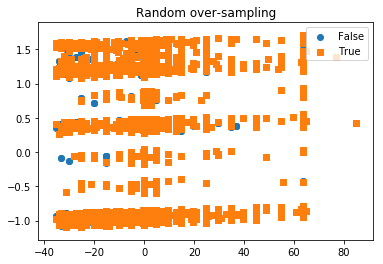

In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X_train.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

Removed indexes: [    0     1     2 ... 40231 40232 40233]


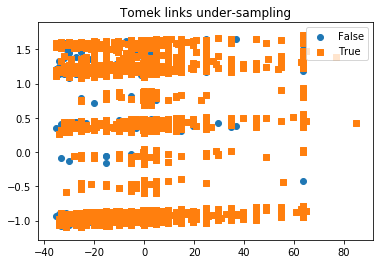

In [39]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

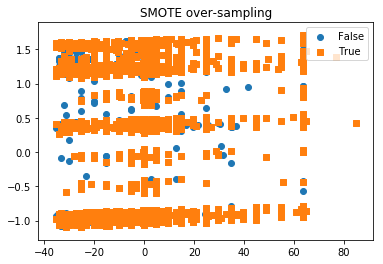

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-pa

Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.5301427432794725


[Test] Accuracy score (y_pred_test, y_test): 0.5303057749438447
Classification Report for Test data: 
              precision    recall  f1-score   support

       False       0.53      0.49      0.51     27602
        True       0.53      0.57      0.55     27602

   micro avg       0.53      0.53      0.53     55204
   macro avg       0.53      0.53      0.53     55204
weighted avg       0.53      0.53      0.53     55204



In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

# Fit it to the data
logreg_cv.fit(X_sm,y_sm)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Predict the labels of the test set: y_pred
y_predsm = logreg_cv.predict(X_sm)
print("\n")
print("[Test] Accuracy score (y_pred_test, y_test):",accuracy_score(y_predsm, y_sm))


# Compute and print the classification report
print('Classification Report for Test data: ')
print(classification_report(y_sm, y_predsm))

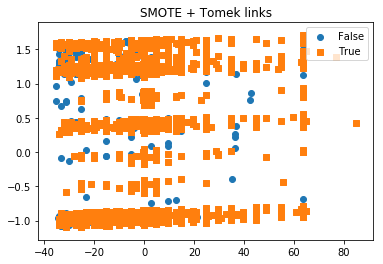

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.5311076547050327


[Test] Accuracy score (y_pred_test, y_test): 0.5311632040884346
Classification Report for Test data: 
              precision    recall  f1-score   support

       False       0.53      0.49      0.51     27003
        True       0.53      0.57      0.55     27003

   micro avg       0.53      0.53      0.53     54006
   macro avg       0.53      0.53      0.53     54006
weighted avg       0.53      0.53      0.53     54006



/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

# Fit it to the data
logreg_cv.fit(X_smt,y_smt)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Predict the labels of the test set: y_pred
y_predsm_test = logreg_cv.predict(X_smt)
print("\n")
print("[Test] Accuracy score (y_pred_test, y_test):",accuracy_score(y_predsm_test, y_smt))


# Compute and print the classification report
print('Classification Report for Test data: ')
print(classification_report(y_smt, y_predsm_test))

##### Conclusion

Based on the above results:
    
    1) We find that the classification scores have greatly improved. There is equal percentage of 2 classes -
        TRUE, FALSE
    2) But the accuracy score had reduced to 0.53 from 0.67. In order to ensure that we have good Recall, precision
       scores along with accuracy, we may have to collect more data so as to ensure that occurences of 2 classes
       are balanced.